# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:
cities_df = pd.DataFrame(cities, columns =['City'])                                           
cities_df 

,City
0,tshela
1,lufilufi
2,saskylakh
3,tuatapere
4,butaritari
...,...
611,port keats
612,iwanai
613,quixada
614,garowe


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# List for holding city, cloudiness, country, date, humidity, lat, lng, max temp, and wind speed                                                                      

cities_df["Cloudiness"]=""
cities_df["Country"]=""
cities_df["Date"]=""
cities_df["Humidity"]=""
cities_df["Lat"]=""
cities_df["Lng"]=""
cities_df["Max Temp"] =""
cities_df["Wind Speed"]=""

#http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID={APIKEY}

# Counter
row_count = 0

# Loop through and run openweahter find data for the empty column
for index, row in cities_df.iterrows():
    # Create endpoint url
    params = {
    "q": cities_df.loc[index]["City"],
    "units": "IMPERIAL",
    "mode": "json",
    "appid": weather_api_key}

    base_url = "http://api.openweathermap.org/data/2.5/weather?"



    # This link helps to handily see the JSON generated for each query
    print("Now retrieving city #%s: %s" % (row_count, cities_df.loc[index]["City"]))
    row_count += 1 
    
    # Run a request to grab the JSON at the base URL
    data = requests.get(base_url, params=params).json()
    try:
        
        cloud = data['clouds']['all']
        country = data["sys"]["country"]
        date = data["dt"]
        humidity = data['main']['humidity']
        lat = data["coord"]["lat"]
        long = data["coord"]["lon"]
        max_temp = data["main"]["temp_max"]
        city_wind = data['wind']['speed']
       
        cities_df.set_value(index, "Cloudiness", cloud)
        cities_df.set_value(index, "Country", country)
        cities_df.set_value(index, "Date", date)
        cities_df.set_value(index, "Humidity", humidity)
        cities_df.set_value(index, "Lat", lat)
        cities_df.set_value(index, "Lng", long)
        cities_df.set_value(index, "Max Temp", max_temp)
        cities_df.set_value(index, "Wind Speed", city_wind)
        
    except:
        print("City not found. Skipping...")
        continue 
    


Now retrieving city #0: tshela
Now retrieving city #1: lufilufi


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\s

Now retrieving city #2: saskylakh
Now retrieving city #3: tuatapere
Now retrieving city #4: butaritari
Now retrieving city #5: port elizabeth
Now retrieving city #6: kapaa
Now retrieving city #7: segezha
Now retrieving city #8: nusaybin
Now retrieving city #9: livny
Now retrieving city #10: vaini
Now retrieving city #11: gizo
Now retrieving city #12: mar del plata
Now retrieving city #13: tumannyy
City not found. Skipping...
Now retrieving city #14: nikolskoye
Now retrieving city #15: rikitea
Now retrieving city #16: akyab
Now retrieving city #17: lompoc
Now retrieving city #18: tiruvidaimarudur
Now retrieving city #19: busselton
Now retrieving city #20: byron bay
Now retrieving city #21: saleaula
City not found. Skipping...
Now retrieving city #22: atuona
Now retrieving city #23: punta arenas
Now retrieving city #24: pisco
Now retrieving city #25: lebu
Now retrieving city #26: la estancia
Now retrieving city #27: thompson
Now retrieving city #28: vanavara
Now retrieving city #29: ushu

Now retrieving city #222: severo-yeniseyskiy
Now retrieving city #223: arraial do cabo
Now retrieving city #224: aswan
Now retrieving city #225: attawapiskat
City not found. Skipping...
Now retrieving city #226: yerbogachen
Now retrieving city #227: urucui
Now retrieving city #228: poum
Now retrieving city #229: eureka
Now retrieving city #230: hasaki
Now retrieving city #231: almaznyy
Now retrieving city #232: el prat de llobregat
Now retrieving city #233: port hedland
Now retrieving city #234: avera
Now retrieving city #235: mezen
Now retrieving city #236: puerto leguizamo
Now retrieving city #237: deputatskiy
Now retrieving city #238: panshi
Now retrieving city #239: fortuna
Now retrieving city #240: amapa
Now retrieving city #241: imbituba
Now retrieving city #242: isangel
Now retrieving city #243: iqaluit
Now retrieving city #244: khormuj
City not found. Skipping...
Now retrieving city #245: benjamin constant
Now retrieving city #246: campana
Now retrieving city #247: cody
Now ret

Now retrieving city #443: jiangyou
Now retrieving city #444: warqla
City not found. Skipping...
Now retrieving city #445: bolivar
Now retrieving city #446: abalak
Now retrieving city #447: pokrovsk
Now retrieving city #448: yabassi
Now retrieving city #449: inhambane
Now retrieving city #450: fairbanks
Now retrieving city #451: yangjiang
Now retrieving city #452: shingu
Now retrieving city #453: lorengau
Now retrieving city #454: belmonte
Now retrieving city #455: imeni babushkina
Now retrieving city #456: coahuayana
Now retrieving city #457: cap malheureux
Now retrieving city #458: kudahuvadhoo
Now retrieving city #459: suslovo
Now retrieving city #460: makaha
Now retrieving city #461: kita
Now retrieving city #462: baracoa
Now retrieving city #463: ardistan
City not found. Skipping...
Now retrieving city #464: eseka
Now retrieving city #465: half moon bay
Now retrieving city #466: aquiraz
Now retrieving city #467: caluquembe
Now retrieving city #468: steinbach
Now retrieving city #46

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Save the dataframe to designated output file as a csv
cities_df.to_csv(output_data_file, encoding="utf-8", index=False)

cities_df.count()


City          616
Cloudiness    616
Country       616
Date          616
Humidity      616
Lat           616
Lng           616
Max Temp      616
Wind Speed    616
dtype: int64

In [6]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tshela,100,CD,1583906775,97,-4.98,12.93,74.61,1.25
1,lufilufi,97,WS,1583906775,70,-13.87,-171.6,87.01,4
2,saskylakh,0,RU,1583906746,83,71.92,114.08,-15.48,17.76
3,tuatapere,61,NZ,1583906776,69,-46.13,167.68,55.99,3
4,butaritari,18,KI,1583906725,77,3.07,172.79,84,20.74


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

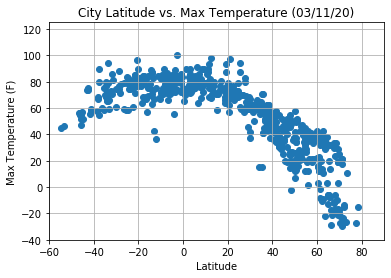

In [45]:
# read new data
data_df = pd.read_csv(output_data_file)

date_unix = data_df.iloc[0,3]
date = time.strftime("%D", time.localtime(int(date_unix)))

#date = time.strftime("%D %H:%M", time.localtime(int(date_unix)))


x_axis = data_df["Lat"]
y_axis = data_df["Max Temp"]

x = x_axis
y = y_axis

plt.grid(True)
plt.xlim([-60, 90])
plt.ylim([-40, 125])

plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.scatter(x, y)
plt.savefig('City_Lat_vs_Max_Temp.png')

plt.show()


#### Latitude vs. Humidity Plot

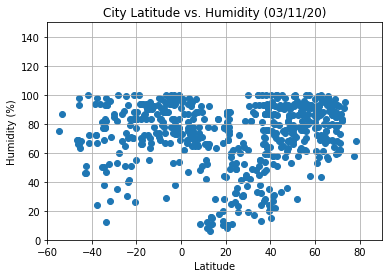

In [46]:
date_unix = data_df.iloc[0,3]
date = time.strftime("%D", time.localtime(int(date_unix)))

#date = time.strftime("%D %H:%M", time.localtime(int(date_unix)))


x_axis = data_df["Lat"]
y_axis = data_df["Humidity"]

x = x_axis
y = y_axis

plt.grid(True)
plt.xlim([-60, 90])
plt.ylim([0, 150])

plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.scatter(x, y)
plt.savefig('City_Lat_vs_Humidity.png')

plt.show()

#### Latitude vs. Cloudiness Plot

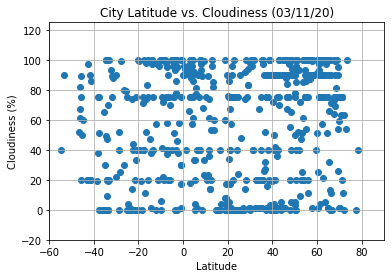

In [49]:
date_unix = data_df.iloc[0,3]
date = time.strftime("%D", time.localtime(int(date_unix)))

#date = time.strftime("%D %H:%M", time.localtime(int(date_unix)))


x_axis = data_df["Lat"]
y_axis = data_df["Cloudiness"]

x = x_axis
y = y_axis

plt.grid(True)
plt.xlim([-60, 90])
plt.ylim([-20, 125])

plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.scatter(x, y)
plt.savefig('City_Lat_vs_Cloudiness.png')

plt.show()

#### Latitude vs. Wind Speed Plot

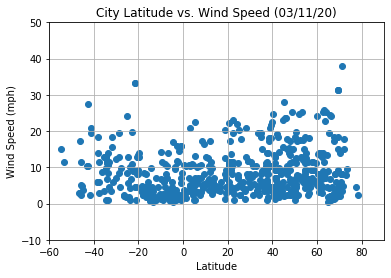

In [51]:
date_unix = data_df.iloc[0,3]
date = time.strftime("%D", time.localtime(int(date_unix)))

#date = time.strftime("%D %H:%M", time.localtime(int(date_unix)))


x_axis = data_df["Lat"]
y_axis = data_df["Wind Speed"]

x = x_axis
y = y_axis

plt.grid(True)
plt.xlim([-60, 90])
plt.ylim([-10, 50])

plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(x, y)
plt.savefig('City_Lat_vs_Wind Speed.png')

plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [56]:
# Create Northern and Southern Hemisphere DataFrames

nh_df = data_df[data_df.Lat>=0]
sh_df = data_df[data_df.Lat<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8754260760694579


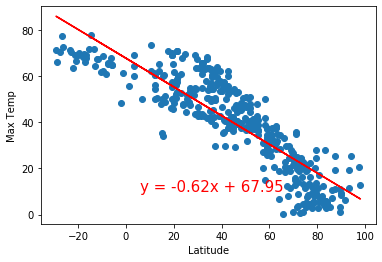

In [68]:
# Print out the r-squared value along with the plot.
x_values = nh_df['Max Temp']
y_values = nh_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49366041725091026


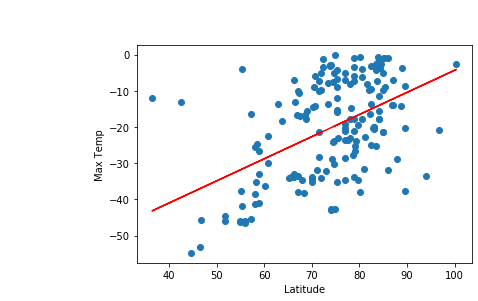

In [66]:
# Print out the r-squared value along with the plot.
x_values = sh_df['Max Temp']
y_values = sh_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3013669597862898


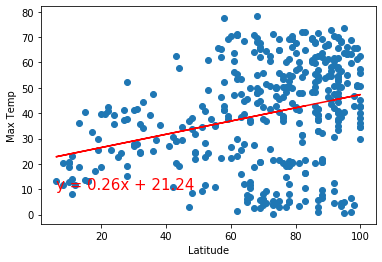

In [69]:
# Print out the r-squared value along with the plot.
x_values = nh_df['Humidity']
y_values = nh_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.26261412977384213


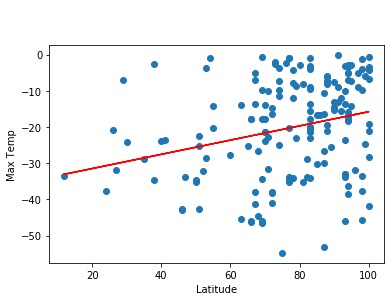

In [70]:
# Print out the r-squared value along with the plot.
x_values = sh_df['Humidity']
y_values = sh_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1278033550709189


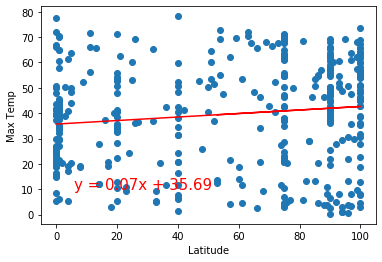

In [71]:
# Print out the r-squared value along with the plot.
x_values = nh_df['Cloudiness']
y_values = nh_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1565594741490015


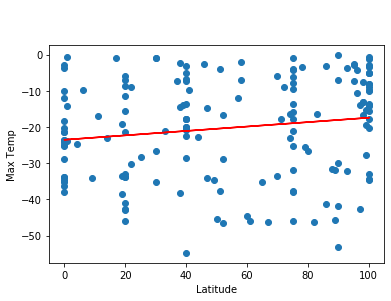

In [72]:
# Print out the r-squared value along with the plot.
x_values = sh_df['Cloudiness']
y_values = sh_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.15014616261748692


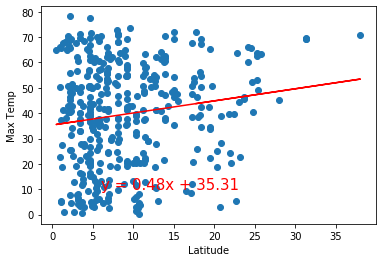

In [73]:
# Print out the r-squared value along with the plot.
x_values = nh_df['Wind Speed']
y_values = nh_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.28326396415239463


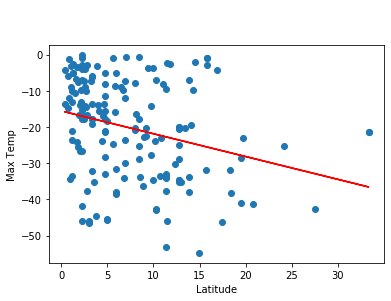

In [74]:
# Print out the r-squared value along with the plot.
x_values = sh_df['Wind Speed']
y_values = sh_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()